## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

In [1]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

## Defining Functions

In [2]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [3]:
dir = 'C:/Users/Piyush/Google Drive/MScA/nlp/assignment_3/'

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Assignment_3_Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

In [5]:
books_n = list(x)
books_similarity = list(y)

Plot the distributions

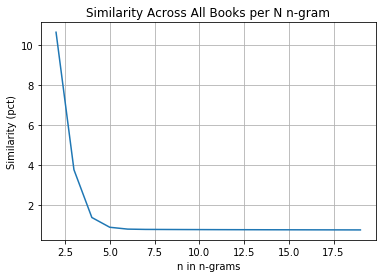

In [6]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

I would recommend n as 4 as we see steep drop in similarity percentage from 2 to 4 which is an indication that for n = 2,3 stopwords are being counted as similar between books. At n=4 we would have some stopwords being counted as duplicate, however the difference between 4 and 5 is very less and would be worth selecting a smaller n. In addition, the similarity percentage for n 5 and above is consistent which indicates that we definately have duplicates, however selecting n as 5 or higher might not provide a generalized threshold and could lead to over-fitting.

### Running for Articles

In [7]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Assignment_3_Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

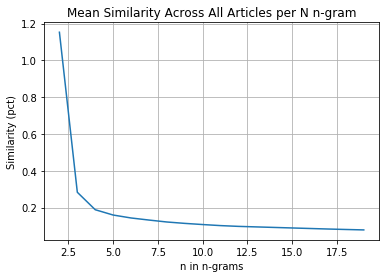

In [8]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

I would recommend n as 3 as we see steep drop in similarity percentage from 2 to 3 which is an indication that for n = 2 stopwords are being counted as similar between books. At n=3 we would have some stopwords being counted as duplicate, however the difference between 3 and 4 is very less and would be worth selecting a smaller n. In addition, the similarity percentage for n = 4 and above is reducing very less and headed towards 0. Selecting n = 4 might seem ideal however it is possible the value may not be generalized for all articles.

## Books measuring similarity

After having our n for books chosen as '4', we'll examine the similairty of our set of books, and use a
threshold value of 2%. This threshold value will filter our any books with similarities below that value, in order
to allow us to focus on the most promininent combinations of books that are similar.

In [9]:
books_comparison = compare_files(dir+'Assignment_3_Books/',ngram_size=4,threshold=0.02)


for key, similarity_index in books_comparison.items():
    book1, book2 = key.split(',')
    print ("{0} is similar to {1} with a Similarity Index of {2:.3%}".format(book1, book2, similarity_index))

Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%
Hound_of_the_Baskervilles.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.430%


## Articles measuring similarity

After having our n for articles chosen as '3', we'll examine the similairty of our set of articles, and use a
threshold value of 3%. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

In [10]:
articles_comparison = compare_files(dir+'Assignment_3_Articles/',ngram_size=3,threshold=0.03)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print("{0} is similar to {1} with a Similarity Index of {2:.3%}".format(art1, art2, similarity_index))

article1.txt is similar to article18.txt with a Similarity Index of 3.681%
article10.txt is similar to article13.txt with a Similarity Index of 21.798%
article10.txt is similar to article14.txt with a Similarity Index of 3.052%
article10.txt is similar to article6.txt with a Similarity Index of 6.166%
article14.txt is similar to article6.txt with a Similarity Index of 8.135%
article16.txt is similar to article17.txt with a Similarity Index of 72.589%
article18.txt is similar to article3.txt with a Similarity Index of 3.150%
article26.txt is similar to article28.txt with a Similarity Index of 9.790%
article26.txt is similar to article31.txt with a Similarity Index of 8.000%
article28.txt is similar to article31.txt with a Similarity Index of 8.621%
article3.txt is similar to article4.txt with a Similarity Index of 13.592%


## Analysis results

###### Which articles / books were similar and which ones were dissimilar?

Following articles and books were similar/dissimilar

###### Books (Similar)
 - Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%
 - Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%
 - Hound_of_the_Baskervilles.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.430%

###### Books (Dissimilar)
3boat10 is dissimilar to Adventures_of_Sherlock_Holmes, Return_of_Sherlock_Holmes, and Hound_of_the_Baskervilles

###### Articles (Similar)

 - article1.txt is similar to article18.txt with a Similarity Index of 3.681%
 - article10.txt is similar to article13.txt with a Similarity Index of 21.798%
 - article10.txt is similar to article14.txt with a Similarity Index of 3.052%
 - article10.txt is similar to article6.txt with a Similarity Index of 6.166%
 - article14.txt is similar to article6.txt with a Similarity Index of 8.135%
 - article16.txt is similar to article17.txt with a Similarity Index of 72.589%
 - article18.txt is similar to article3.txt with a Similarity Index of 3.150%
 - article26.txt is similar to article28.txt with a Similarity Index of 9.790%
 - article26.txt is similar to article31.txt with a Similarity Index of 8.000%
 - article28.txt is similar to article31.txt with a Similarity Index of 8.621%
 - article3.txt is similar to article4.txt with a Similarity Index of 13.592%

###### Articles (Dissimilar)
 - article2
 - article5
 - article7
 - article8
 - article9
 - article11
 - article12
 - article15
 - article19
 - article20
 - article21
 - article22
and so on

###### A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)

I chose n by looking at the plots and the slope change between different values of n. A steep drop is slope represents reduction of false positives. Once the slope starts plateauing, we start seeing actual duplicates. These are the duplicates which we care about, however these duplicates probably include some false positives. Taking a larger value of n would have prevented false positives, however it would have also led to over-fitting (i.e. the value of n and threshold will have been a generalized value for use with unseen data).

###### Was the “n” identical or different for books vs. articles and why

The value of n for books and article is different. Explanation as follows,

###### Books (n = 4)

I would recommend n as 4 as we see steep drop in similarity percentage from 2 to 4 which is an indication that for n = 2,3 stopwords are being counted as similar between books. At n=4 we would have some stopwords being counted as duplicate, however the difference between 4 and 5 is very less and would be worth selecting a smaller n. In addition, the similarity percentage for n 5 and above is consistent which indicates that we definately have duplicates, however selecting n as 5 or higher might not provide a generalized threshold and could lead to over-fitting.

###### Articles (n = 3)

I would recommend n as 3 as we see steep drop in similarity percentage from 2 to 3 which is an indication that for n = 2 stopwords are being counted as similar between books. At n=3 we would have some stopwords being counted as duplicate, however the difference between 3 and 4 is very less and would be worth selecting a smaller n. In addition, the similarity percentage for n = 4 and above is reducing very less and headed towards 0. Selecting n = 4 might seem ideal however it is possible the value may not be generalized for all articles.


###### Visualize the selection of “n”

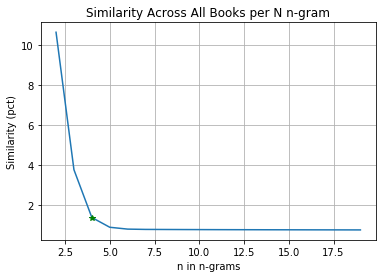

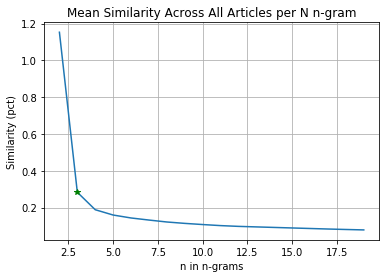

In [11]:
plt.plot(books_n, books_similarity, linestyle = '-')
plt.plot(books_n[2], books_similarity[2], 'g*')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

plt.plot(x,y, linestyle = '-')
plt.plot(x[1], y[1], 'g*')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()